In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [17]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


           Category Sub-Category        Sales
0         Furniture    Bookcases   30024.2797
1         Furniture       Chairs   93191.2730
2         Furniture  Furnishings   28204.6920
3         Furniture       Tables   60893.5425
4   Office Supplies   Appliances   40212.7220
5   Office Supplies          Art    8825.6320
6   Office Supplies      Binders   71721.2550
7   Office Supplies    Envelopes    3378.5740
8   Office Supplies    Fasteners     855.0740
9   Office Supplies       Labels    3844.6960
10  Office Supplies        Paper   27504.7760
11  Office Supplies      Storage   68072.7020
12  Office Supplies     Supplies   15952.1100
13       Technology  Accessories   58240.9700
14       Technology      Copiers   62899.3880
15       Technology     Machines   43544.6750
16       Technology       Phones  104685.6580


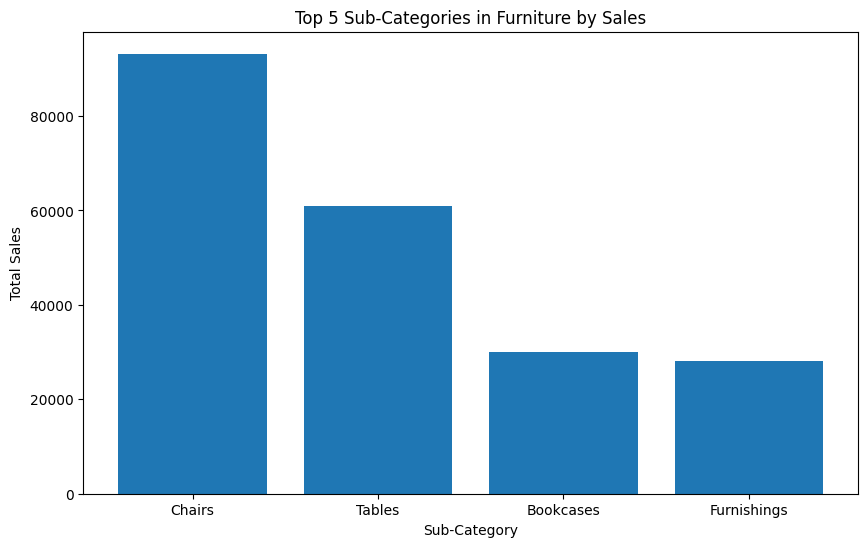

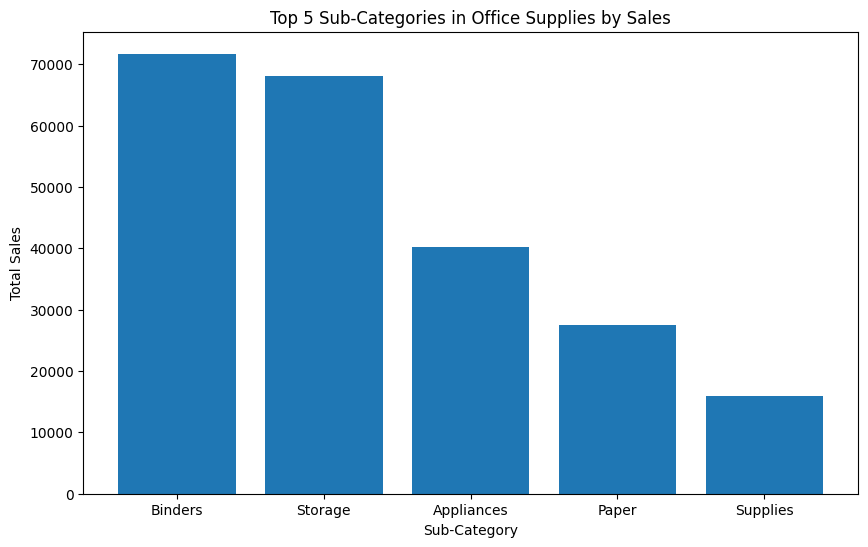

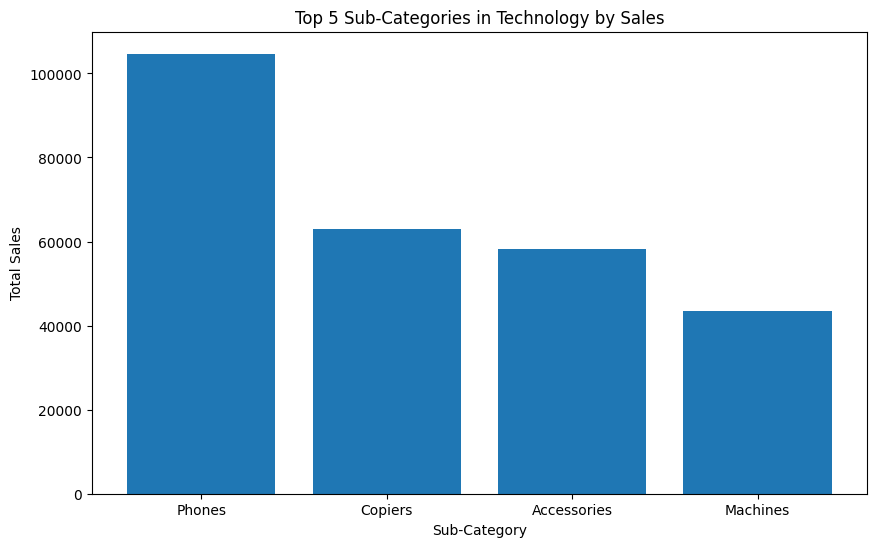

In [22]:
import pandas as pd

# Convert 'Order Date' column to datetime format with explicit date format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Filter data for the years 2018 to 2020
filtered_data = df[(df['Order Date'].dt.year >= 2018) & (df['Order Date'].dt.year <= 2020)]

# print(filtered_data)

grouped_data = filtered_data.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum'}).reset_index()
print(grouped_data)

sorted_data = grouped_data.sort_values(by=['Category', 'Sales'], ascending=[True, False])

# Visualize the top 5 sub-categories in each category by sales
for category, group in sorted_data.groupby('Category'):
    top_subcategories = group.head(5)
    plt.figure(figsize=(10, 6))
    plt.bar(top_subcategories['Sub-Category'], top_subcategories['Sales'])
    plt.title(f'Top 5 Sub-Categories in {category} by Sales')
    plt.xlabel('Sub-Category')
    plt.ylabel('Total Sales')
    plt.show()

In [26]:
# Group by 'Customer ID' and calculate purchase frequency, average purchase value, and total sales
customer_summary = df.groupby('Customer ID').agg(
    Purchase_Frequency=('Order ID', 'nunique'),
    Average_Purchase_Value=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum')
).reset_index()

print(customer_summary)

customer_summary['CLV'] = customer_summary['Purchase_Frequency'] * customer_summary['Average_Purchase_Value']

print(customer_summary[['Customer ID', 'CLV']])

    Customer ID  Purchase_Frequency  Average_Purchase_Value  Total_Sales
0      AA-10315                   5              505.778182     5563.560
1      AA-10375                   9               70.426000     1056.390
2      AA-10480                   4              149.209333     1790.512
3      AA-10645                   6              282.607500     5086.935
4      AB-10015                   3              147.692667      886.156
..          ...                 ...                     ...          ...
788    XP-21865                  11               84.809214     2374.658
789    YC-21895                   5              681.793750     5454.350
790    YS-21880                   8              560.037000     6720.444
791    ZC-21910                  13              258.893774     8025.707
792    ZD-21925                   5              165.993778     1493.944

[793 rows x 4 columns]
    Customer ID          CLV
0      AA-10315  2528.890909
1      AA-10375   633.834000
2      AA-104

    Customer ID          CLV
700    SM-20320  8347.683333
741    TC-20980  7938.424167
6      AB-10105  7236.785500
683    SE-20110  7068.622000
327    HL-15040  7021.798909
..          ...          ...
659    RS-19870    14.885333
681    SC-20845    14.112000
508    MG-18205     8.369500
456    LD-16855     5.304000
760    TS-21085     4.833000

[793 rows x 2 columns]


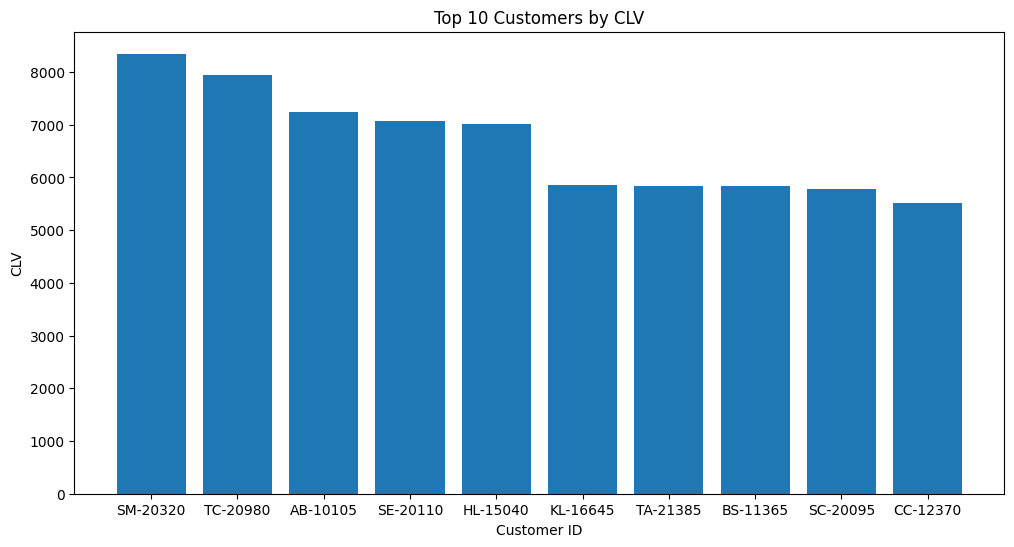

In [27]:
sorted_customers = customer_summary.sort_values(by='CLV', ascending=False)

# Display the top customers and their CLV contributions
print(sorted_customers[['Customer ID', 'CLV']])

# Visualize the contribution of top customers
top_n = 10
plt.figure(figsize=(12, 6))
plt.bar(sorted_customers['Customer ID'].head(top_n), sorted_customers['CLV'].head(top_n))
plt.title(f'Top {top_n} Customers by CLV')
plt.xlabel('Customer ID')
plt.ylabel('CLV')
plt.show()